![](./img/sktime-logo-text-horizontal.jpg)

![](./img/Introslide-sktime.png)

# Content
1. Getting started with sktime (this notebook)
2. Forecasting Pipelines and Global Forecasting with sktime
3. Benchmarking with sktime

# Getting Started with sktime
sktime provides algorithms for:
* classification
* anomaly detection
* time series segmentation
* transformation
* regression
* forecasting


Interfaces are strongly inspired from sklearn and might differentiate only slightly depending on the task.

### Classification

In [1]:
# Import necessary modules
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head

# Load dataset
X_train, y_train = load_arrow_head(split="train")
X_test, y_test = load_arrow_head(split="test")

# Create classifier
clf = TimeSeriesForestClassifier(n_estimators=5)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict classes
y_pred = clf.predict(X_test)

# TODO we need some kind of visualiazation of the results

### Anomaly Detection

<Axes: >

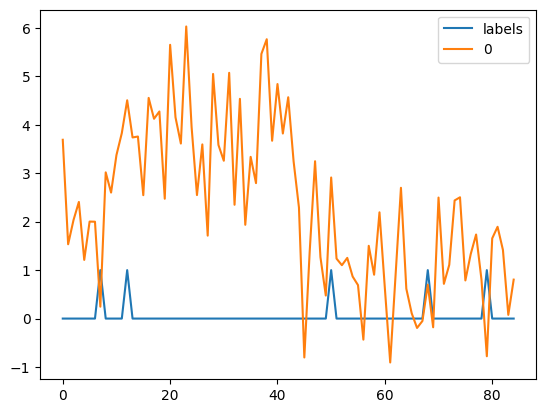

In [2]:
# Import necessary modules
import pandas as pd
from sktime.detection.lof import SubLOF
from sktime.detection.datagen import piecewise_normal

# Create synthetic data
data = piecewise_normal(
    means=[2, 4, 1], lengths=[10, 35, 40], random_state=7
    ).reshape((-1, 1))


# TODO perhaps use different model that produces better results?

# Instantiate outlier detection model
model = SubLOF(3, window_size=5, novelty=True)

# TODO seems to be a bug here? Why can it not handle numpy data? 
# Do fit and transform in one step by calling fit_transform
ax = model.fit_transform(pd.DataFrame(data)).plot()
pd.DataFrame(data).plot(ax=ax)

### Forecasting

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

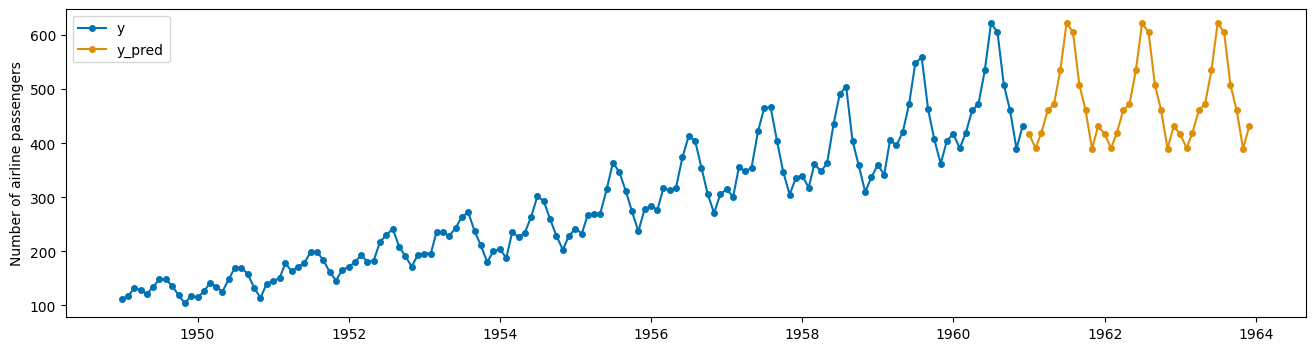

In [3]:
# Forecasting# Naive Forecaster with airline datset
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series


y = load_airline()


# specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# fitting the forecaster
forecaster.fit(y)

# querying predictions
y_pred = forecaster.predict(fh=range(1,37))

# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])